# 1. Keras tutorial

- 1.1 Keras Basic(y=3x Regression) - ANN(단층 레이어)
- 1.2 Keras MNIST - ANN(단층 레이어)
- 1.3 Keras MNIST - DNN(다층 레이어)
- 1.4 Keras MNIST - 나만의 모델 만들기

In [4]:
# Import Libraries
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1.1 Keras Basic Y = 3X ANN Regression
- 이번 실습에서는 Keras를 이용하여 1차함수를 예측하는 학습 모델을 만들고, 성능을 평가한다.

### (1) 데이터셋 준비

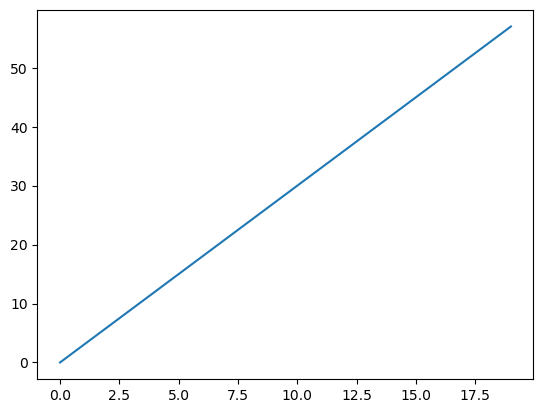

In [6]:
# Training Data
x = np.arange(20) # 0, 1, 2, 3, ...., 19
y = x * 3 # 0, 3, 6, 9, ..., 57
plt.plot(x,y)

# Testing Data 
x_test = np.arange(50,70) # 50, 51, 52, ..., 69
y_test = x_test*3 # 150, 153, 156, ..., 207

# Dimension of input and output
n_in = 1
n_out = 1

### (2) Keras 모델링

- keras.layers : 모델을 구성하기 위한 layer들이 구현되어 있는 모듈

- keras.models : layer들을 묶어 모델을 정의하고 학습, 평가, 예측 등의 기능을 구현한 모듈

In [ ]:
from tensorflow.keras import layers, models

Keras에서는 크게 Functional, Sequential 방식으로 모델을 구현

- Sequential : 모델에 필요한 layer들을 순차적으로 더해가는 방식으로 구현
- Function : 모델을 수식처럼 구현 

<Sequential에 사용되는 Layer>

- Dense : Fully Connected Layer (https://keras.io/layers/core/#dense)

### Sequential Modeling

In [ ]:
def modeling_sequential(n_in, n_out):
    model = models.Sequential()
    model.add(layers.Dense(units =n_out, input_shape=(n_in,)))
    return model

In [ ]:
class modeling_sequential_class(models.Sequential):
    def __init__(self, n_in, n_out):
        
        #멤버 변수로 모델에 사용할 변수 선언
        self.n_in = n_in
        self.n_out = n_out
        
        #상속받은 Sequential 클래스 초기화 후 레이어 추가
        super().__init__()
        self.add(layers.Dense(units =n_out, input_shape=(n_in,)))

<Functional에 사용되는 Layer>

- Input : 모델에 입력되는 데이터의 batch size를 제외한 shape을 결정

- Dense : Fully Connected Layer (https://keras.io/layers/core/#dense)

### Functional Modeling

In [ ]:
def modeling_functional(n_in, n_out):
    input = layers.Input(shpe=(n_in,))
    y = layers.Dense(n_out)(input)
    model = models.Model(inputs = input, outputs = y)
    return model

In [ ]:
class modeling_functional_class(models.Model):
    def __init__(self, n_in, n_out):
        
        #멤버 변수로 모델에 사용할 변수 및 레이어 선언
        self.n_in = n_in
        self.n_out = n_out
        input = layers.Input(shape=(n_in,))
        output = layers.Dense(n_out)
        
        # layer 연결
        x = input
        y = output(x)

        #상속받은 Model 클래스 초기화
        super().__init__(x, y)

### (2)-2 모델 시각화

model.summary()나 plot_model(model) 활용

In [ ]:
model =  modeling_sequential(n_in, n_out)
model.summary()

In [ ]:
model =  modeling_sequential_class(n_in, n_out)
model.summary()

In [ ]:
model =  modeling_functional(n_in, n_out)
model.summary()

In [ ]:
model = modeling_functional_class(n_in, n_out)
model.summary()

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

### (3) 모델의 학습과정 설정(model.compile)
- model.compile(loss, optimizer, metrics)
- optimizer(str) : optimizer instance
- loss(str) : loss function
- metrics(str) : list of metrics to be evaluated by the model during training and testing
(https://www.tensorflow.org/api_docs/python/tf/keras/Model)

In [ ]:
# Coding Time
model.compile(loss ='mse', optimizer='sgd')

### (4) 모델 학습시키기(model.fit)

 - x : Input data
 - y : Label of training input data
 - batch_szie(int) : Number of samples per gradient update
 - steps_per_epoch(int) : Total number of steps (batches of samples) before declaring one epoch finished and starting the next epoch
 - epochs(int) : Number of epochs to train the model
 - verbose : 0 = silent, 1 = progress bar, 2 = one line per epoch
 - callbacks : List of callback instances
 - validation_split(float) : Fraction of the training data to be used as validation data
 - validation_data : (x_val, y_val)
 - shuffle(bool) : Whether to shuffle the training data before each epoch
 - history : 학습과정이 담겨있는 데이터 송출
 (https://www.tensorflow.org/api_docs/python/tf/keras/Model)

In [ ]:
# Coding Time
history = model.fit(x, y, batch_size = 5, epochs=100, validation_split = 0.2)

### (5) 모델 평가하기
모델 객체의 evaluate 함수로 test 데이터에 대한 모델의 성능을 평가
 - x : Input data
 - y : Label of testing input data
 - batch_size(int) : Number of samples per batch of computation
 - steps(int) : Total number of steps (batches of samples) before declaring the evaluation round finished
 - verbose : 0 = silent, 1 = progress bar, 2 = one line per epoch

In [ ]:
# Coding Time
loss = model.evaluate(x_test, y_test, batch_size=20)
print('loss : %.4f' %(loss))

## (6) 모델 사용하기
모델 객체의 predict 함수로 input 데이터에 대한 모델의 예측결과를 반환
 - x : Input data
 - batch_size(int) : Number of samples per batch
 - steps(int) : Total number of steps (batches of samples) before declaring the prediction round finished
 - verbose : 0 = silent(recommend), 1 = progress bar, 2 = one line per epoch

In [ ]:
new_x = np.arange(100,120)
true_y = new_x*3

pred_y = model.predict(new_x, batch_size=20, verbose = 0)
pred_y = np.reshape(pred_y,(-1,))
for y in zip(new_x, true_y, pred_y):
    print("x: %.2f,  y : %.2f,  y_predict : %.2f"%(y[0], y[1], y[2]))

## 1.2 MNIST Classification with Linear Classifier
이번 실습에서는 keras로 linear 모델을 생성하고, MNIST dataset을 학습하여 성능을 평가한다.

In [7]:
import tensorflow.keras.utils as utils
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Activation

import numpy as np
import matplotlib.pyplot as plt

### (1) 데이터셋 다운로드
### Download the MNIST dataset
MNIST dataset은 28x28 사이즈의 이미지들로 0~9까지의 숫자 10개의 손글씨 이미지로 이루어져있다.

60,000장이 training에 사용되고 10,000장이 test에 사용된다.

In [8]:
# Coding Time
(x_train, y_train),(x_test, y_test) = datasets.mnist.load_data()
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


label :  5


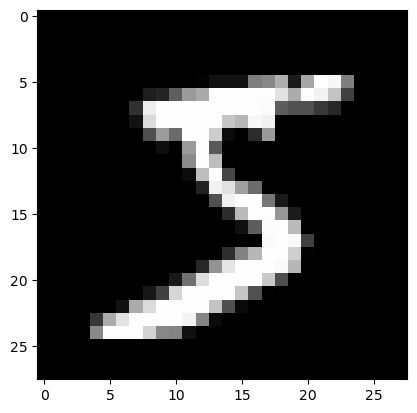

In [9]:
print('label : ',y_train[0])
plt.imshow(x_train[0], cmap='gray')

In [10]:
# Coding Time
# Flatten and Normalization
x_train_flat = x_train.reshape(60000, 28*28).astype('float32')/255.0
x_test_flat = x_test.reshape(10000, 28*28).astype('float32')/255.0

# One-hot Encoding(label)
y_train_onehot = utils.to_categorical(y_train)
y_test_onehot = utils.to_categorical(y_test)

print(y_train_onehot)
print(x_train_flat.shape, y_train_onehot.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
(60000, 784) (60000, 10)


### (2) Keras 모델링

<사용되는 Layer>

- Input : 모델에 입력되는 데이터의 batch size를 제외한 shape을 결정(https://keras.io/layers/core/#input)

- Dense : Fully Connected Layer(https://keras.io/layers/core/#dense)

- Activation : Activation Function을 정의, 문자열로 입력(https://keras.io/layers/core/#activation)

In [ ]:
n_in = 28*28   #784
n_out = np.shape(y_test_onehot)[1] # 10

### Sequential Modeling

In [ ]:
def linear_model_seq(n_in, n_out):
    # Coding Time
    model = Sequential()
    model.add(Dense(units = n_out, input_shape=(n_in,), activation='softmax'))
    return model

### Functional Modeling

In [ ]:
def linear_model_func(n_in, n_out):
    # Coding Time
    input = Input(shape=(n_in,))
    h = layers.Dense(n_out)(input)
    y = Activation('softmax')(h)
    model = models.Model(inputs = input, outputs = y)
    return model

In [ ]:
model = linear_model_func(n_in, n_out)
model.summary()

In [ ]:
plot_model(model, show_shapes=True)

## (3) 모델의 학습과정 설정
accuracy를 측정할 수 있는 문제라면 metric에 accuracy를 설정 (https://keras.io/models/model/)

In [ ]:
# Coding Time
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

## (4) 모델 학습시키기

In [ ]:
# Coding Time
history = model.fit(x_test_flat, y_test_onehot, validation_split=0.2, batch_size = 128, epochs=20)

## (5) 모델 평가하기

In [ ]:
# Coding Time
loss_and_accuracy = model.evaluate(x_test_flat, y_test_onehot, batch_size = 128)
print('loss : %.4f, accuracy : %.4f' %(loss_and_accuracy[0], loss_and_accuracy[1]))

## (6) 모델 사용하기

In [ ]:
# Coding Time
test_data = x_test[-1].reshape(1,28*28)
pred_y = model.predict(test_data)
pred_y = pred_y.argmax()

print('real_label : {}, predict_label : {}'.format(y_test[-1], pred_y))
plt.imshow(x_test[-1], cmap='gray')

# 1.3 MNIST Classification with DNN (To Do)

모델의 설명을 보고 DNN 코드를 만들어보자

## (2) Keras 모델링

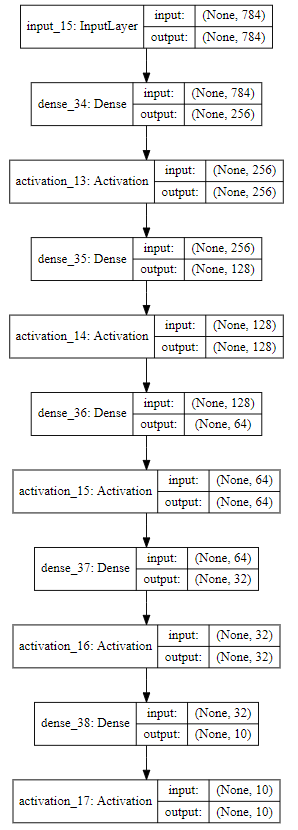

<맨 마지막 activation은 softmax로 하고 이외의 activation은 relu를 사용>

In [ ]:
def DNN_seq(n_in, n_out):
    model = Sequential()
    model.add(Dense(units = 256, input_shape=(n_in,), activation='relu'))
    model.add(Dense(units = 128, input_shape=(256,), activation='relu'))
    model.add(Dense(units = 64, input_shape=(128,), activation='relu'))
    model.add(Dense(units = 32, input_shape=(64,), activation='relu'))
    model.add(Dense(units = n_out, input_shape=(32,), activation='softmax'))
    return model

def DNN_func(n_in, n_out):
    input = Input(shape=(n_in,))
    x = Dense(256)(input)
    x = Activation('relu')(x)
    x = Dense(128)(input)
    x = Activation('relu')(x)
    x = Dense(64)(input)
    x = Activation('relu')(x)
    x = Dense(32)(input)
    x = Activation('relu')(x)
    x = Dense(n_out)(input)
    y = Activation('softmax')(x)
    model = model(inputs = input, outputs = y)
    return model

model = DNN_seq(n_in, n_out)
model.summary()

## (3) 모델의 학습과정 설정
<optimizer를 adam으로 설정>

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## (4) 모델 학습시키기
<batch size를 256, epoch을 30, train 데이터 중 30%를 validation 데이터로 사용, verbose 모드는 2>

In [ ]:
history = model.fit(x_test_flat, y_test_onehot, validation_split=0.3, batch_size = 256, epochs=30, verbose=2)

## (5) 모델 평가하기

In [ ]:
loss_and_accuracy = model.evaluate(x_test_flat, y_test_onehot, batch_size = 256)
print('loss : %.4f, accuracy : %.4f' %(loss_and_accuracy[0], loss_and_accuracy[1]))

## (6) 모델 사용하기

In [ ]:
# Coding Time
test_data = x_test[-1].reshape(1,28*28)
pred_y = model.predict(test_data)
pred_y = pred_y.argmax()

print('real_label : {}, predict_label : {}'.format(y_test[-1], pred_y))
plt.imshow(x_test[-1], cmap='gray')

## (7) 모델 저장하고 불러오기

저장하기 : model 객체의 내부 함수인 save() .h5 형식으로 저장할 수 있음 [1.모델의 구조, 2.학습된 파라미터, 3.complie() 설정]

In [ ]:
# Coding Time
model.save('lastest_model.h5')

불러오기 : load_model 함수로 .h5 파일에서 모델을 불러올 수 있음

In [ ]:
# Coding Time
from tensorflow.keras.models import load_model
model = load_model('lastest_model.h5')
model.fit(x_train_flat, y_train_onehot, batch_size=256, epochs=3, validation_split=0.3)

# ======================================================

# 1.4 Keras MNIST - 모델의 성능을 직접 높혀보자
 - DNN의 구조를 바꾸어 나만의 모델을 만들어보자
 - 목표 정확도: 평가 셋에 대해 98.5% 만들기
 - 바꿀 수 있는 하이퍼 파라미터: Learning Rate, Batch size, Epochs, Optimizer, Activation Function, 모델 레이어 구조 등

## (2) Keras 모델링

In [25]:
n_in = 28*28
n_out = np.shape(y_test_onehot)[1] # 10
def DNN_seq(n_in, n_out):
    model = Sequential()
    model.add(Dense(units = 256, input_shape=(n_in,), activation='relu'))
    model.add(Dense(units = 128, input_shape=(256,), activation='relu'))
    model.add(Dense(units = 64, input_shape=(128,), activation='relu'))
    model.add(Dense(units = 32, input_shape=(64,), activation='relu'))
    model.add(Dense(units = 16, input_shape=(32,), activation='relu'))
    model.add(Dense(units = n_out, input_shape=(16,), activation='softmax'))
    return model

model = DNN_seq(n_in, n_out)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_9 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_10 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_11 (Dense)             (None, 10)                170       
Total params: 244,890
Trainable params: 244,890
Non-trainable params: 0
________________________________________________

## (3) 모델의 학습과정 설정

In [18]:
import tensorflow as tf
adam_tuning = tf.keras.optimizers.Adam(
    learning_rate=1e-6,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam",)

In [26]:
model.compile(loss='categorical_crossentropy', optimizer=adam_tuning, metrics=['accuracy'])

## (4) 모델 학습시키기

In [29]:
history = model.fit(x_train_flat, y_train_onehot, validation_split=0.4, batch_size = 256, epochs=60, verbose=2)

Epoch 1/60
141/141 - 1s - loss: 1.0310e-05 - accuracy: 1.0000 - val_loss: 0.1845 - val_accuracy: 0.9758
Epoch 2/60
141/141 - 1s - loss: 9.5641e-06 - accuracy: 1.0000 - val_loss: 0.1853 - val_accuracy: 0.9757
Epoch 3/60
141/141 - 1s - loss: 8.9248e-06 - accuracy: 1.0000 - val_loss: 0.1868 - val_accuracy: 0.9757
Epoch 4/60
141/141 - 1s - loss: 8.2671e-06 - accuracy: 1.0000 - val_loss: 0.1877 - val_accuracy: 0.9758
Epoch 5/60
141/141 - 1s - loss: 7.6439e-06 - accuracy: 1.0000 - val_loss: 0.1891 - val_accuracy: 0.9756
Epoch 6/60
141/141 - 1s - loss: 7.0646e-06 - accuracy: 1.0000 - val_loss: 0.1901 - val_accuracy: 0.9756
Epoch 7/60
141/141 - 1s - loss: 6.5328e-06 - accuracy: 1.0000 - val_loss: 0.1917 - val_accuracy: 0.9756
Epoch 8/60
141/141 - 1s - loss: 6.0330e-06 - accuracy: 1.0000 - val_loss: 0.1925 - val_accuracy: 0.9757
Epoch 9/60
141/141 - 1s - loss: 5.6112e-06 - accuracy: 1.0000 - val_loss: 0.1939 - val_accuracy: 0.9758
Epoch 10/60
141/141 - 1s - loss: 5.1706e-06 - accuracy: 1.0000 -

## (5) 모델 평가하기

In [30]:
loss_and_accuracy = model.evaluate(x_test_flat, y_test_onehot, batch_size = 256)
print('loss : %.4f, accuracy : %.4f' %(loss_and_accuracy[0], loss_and_accuracy[1]))

40/40 [==============================] - 0s 3ms/step - loss: 0.1906 - accuracy: 0.9791
loss : 0.1906, accuracy : 0.9791


In [ ]:
# Coding Time
test_data = x_test[1].reshape(1,28*28)
pred_y = model.predict(test_data)
pred_y = pred_y.argmax()

print('real_label : {}, predict_label : {}'.format(y_test[-1], pred_y))
plt.imshow(x_test[-1], cmap='gray')